<a href="https://colab.research.google.com/github/vini-fritzen/Inteligencia-Artificial/blob/main/Logica_de_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Instalar a lib fuzzy no python
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
#importando as libs
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import numpy as np

In [52]:
# criando as variáveis de entrada e seus universos
peso = ctrl.Antecedent(np.arange(20,120,1),'peso')
altura = ctrl.Antecedent(np.arange(1.2, 2, 0.1),'altura')

In [53]:
# # criando a variável de saída e seu universo
tamanho = ctrl.Consequent(np.arange(0, 1, .1),'tamanho')

In [54]:
# criando as conjunto Fuzzy e suas funções de pertinência para entrada peso.
peso['baixo'] = fuzz.trimf(peso.universe, [20, 45, 70])
peso['medio'] = fuzz.trimf(peso.universe, [55,75, 95])
peso['alto'] = fuzz.trimf(peso.universe,[80, 100, 120])

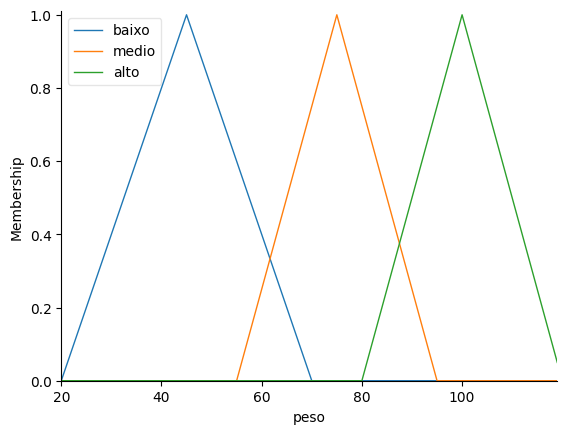

In [55]:
# Visualizando o PESO
peso.view()

In [56]:
# criando as conjunto Fuzzy e suas funções de pertinência para entrada altura.
altura['baixa'] = fuzz.trapmf(altura.universe, [1.2, 1.2, 1.4, 1.5])
altura['media'] = fuzz.trapmf(altura.universe, [1.4, 1.5,1.6,1.7])
altura['alta'] = fuzz.trapmf(altura.universe, [1.68, 1.7,2, 2])

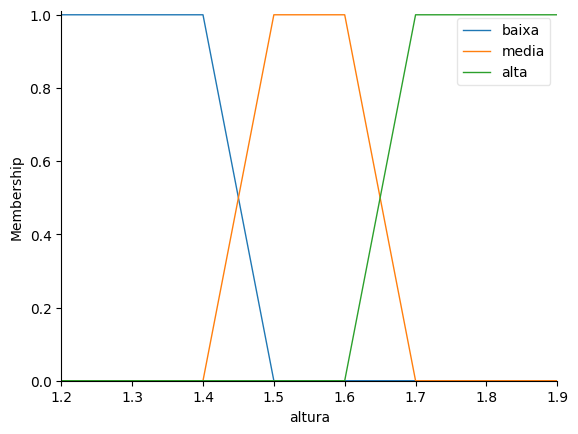

In [57]:
# Visualizando a altura 
altura.view()

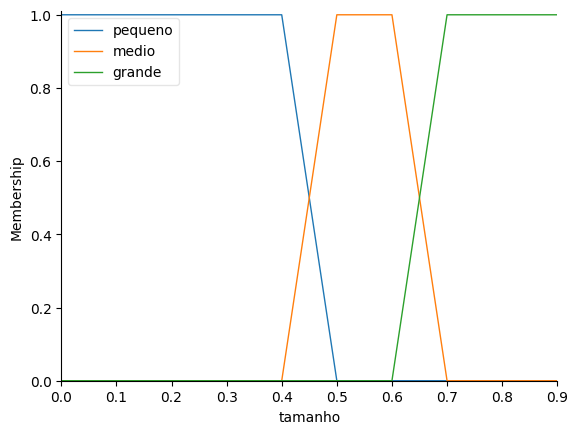

In [58]:
# criando as conjunto Fuzzy e suas funções de pertinência para saída tamanho.
tamanho['pequeno'] = fuzz.trapmf(tamanho.universe,[0,0,0.4,0.5])
tamanho['medio'] = fuzz.trapmf(tamanho.universe,[0.4,0.5,0.6,0.7])
tamanho['grande'] = fuzz.trapmf(tamanho.universe,[0.65,0.7,1,1])
tamanho.view()

In [59]:
# regra 1 - SE peso é baixo ENTÃO tamanho é pequeno;
regra1 = ctrl.Rule(peso['baixo'], tamanho['pequeno'])

# regra 2 - SE altura é mediana OU peso é médio ENTÃO tamanho é médio
regra2 = ctrl.Rule(altura['media'] | peso['medio'], tamanho['medio'])

# regra 3 - SE altura é alta E peso é alto ENTÃO tamanho é grande.
regra3 = ctrl.Rule(altura['alta'] & peso['alto'], tamanho['grande'])

In [60]:
# criando o controlador fuzzy com as regras
fuzzy_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
# criando o motor de inferência.
engine = ctrl.ControlSystemSimulation(fuzzy_ctrl)

Digite o peso: 80
Digite a altura: 1.76
0.55


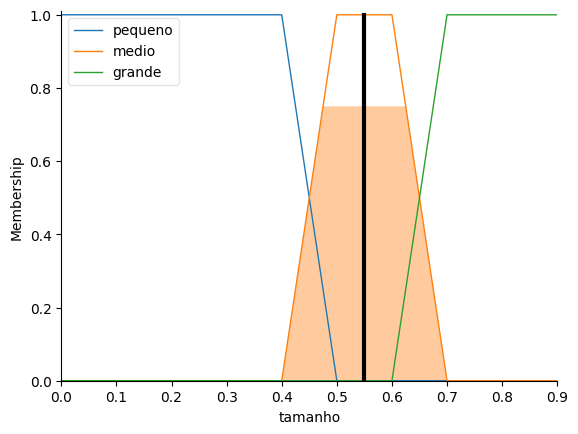

In [61]:
peso_entrada = float(input("Digite o peso: "))
altura_entrada = float(input("Digite a altura: "))

# passa as prediçoes dos modelos para suas respectivas
engine.input[ 'peso'] = peso_entrada
engine.input[ 'altura'] = altura_entrada

# calcula a saida do sistema de controle fuzzy
engine.compute()

# retorna o valor crisp e o grafico mostrando-o
print(engine.output['tamanho'])
tamanho.view(sim=engine)